<a href="https://colab.research.google.com/github/wooje-jung/class-project/blob/main/Bitcoin_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AI 프로그래밍 연습 - Final project

#0. 모듈 설치

In [1]:
!pip install pyupbit

In [2]:
# talib(Technical Analysis Library)을 사용하기위해 설치
# https://xikest.tistory.com/16
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

--2023-12-03 08:39:48--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-12-03 08:39:48--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://netactuate.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-12-03 08:39:48--  http://netactuate.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving netactuat

In [3]:
!pip install numpy pandas matplotlib scikit-learn tensorflow

#1. 비트코인 가격정보 수집
<모델에 학습시킬 데이터>

1.   수집대상 : 업비트 -> 비트코인 가격정보 o
2.   수집날짜 : 2021-11-01 ~ 2022.12.31

 --> 가격정보기반으로 보조지표 생성 o
 --> 환경 예측요소 (환율, 환율 이동평균, 전 산업 생산지수)



In [4]:
import pyupbit
import pandas as pd

In [5]:
pyupbit.get_tickers(fiat='KRW-BTC')

['KRW-BTC']

In [6]:
# 비트코인
ticker = 'KRW-BTC'
interval = 'day'
to = '2023-1-1 00:00 '
count = 365
data_price = pyupbit.get_ohlcv(ticker=ticker,interval=interval,to=to,count=count)
data_price = pd.DataFrame(data_price)

In [7]:
data_price

,open,high,low,close,volume,value
2022-01-01 09:00:00,56784000.0,58271000.0,56762000.0,57915000.0,2628.145965,1.510645e+11
2022-01-02 09:00:00,57915000.0,58300000.0,57100000.0,57531000.0,3567.505712,2.052913e+11
2022-01-03 09:00:00,57540000.0,57749000.0,56133000.0,56641000.0,6304.958564,3.600635e+11
2022-01-04 09:00:00,56640000.0,57685000.0,56000000.0,56023000.0,6053.445802,3.425126e+11
2022-01-05 09:00:00,56023000.0,57100000.0,52701000.0,53854000.0,9296.798714,5.152768e+11
...,...,...,...,...,...,...
2022-12-27 09:00:00,21711000.0,21745000.0,21242000.0,21321000.0,2842.524510,6.110500e+10
2022-12-28 09:00:00,21324000.0,21396000.0,21010000.0,21061000.0,3151.280761,6.675252e+10
2022-12-29 09:00:00,21061000.0,21295000.0,20908000.0,21201000.0,2464.457822,5.197588e+10
2022-12-30 09:00:00,21201000.0,21232000.0,20700000.0,21070000.0,2699.072216,5.657707e+10


In [8]:
data_price.to_csv('bitcoinprice.csv')

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

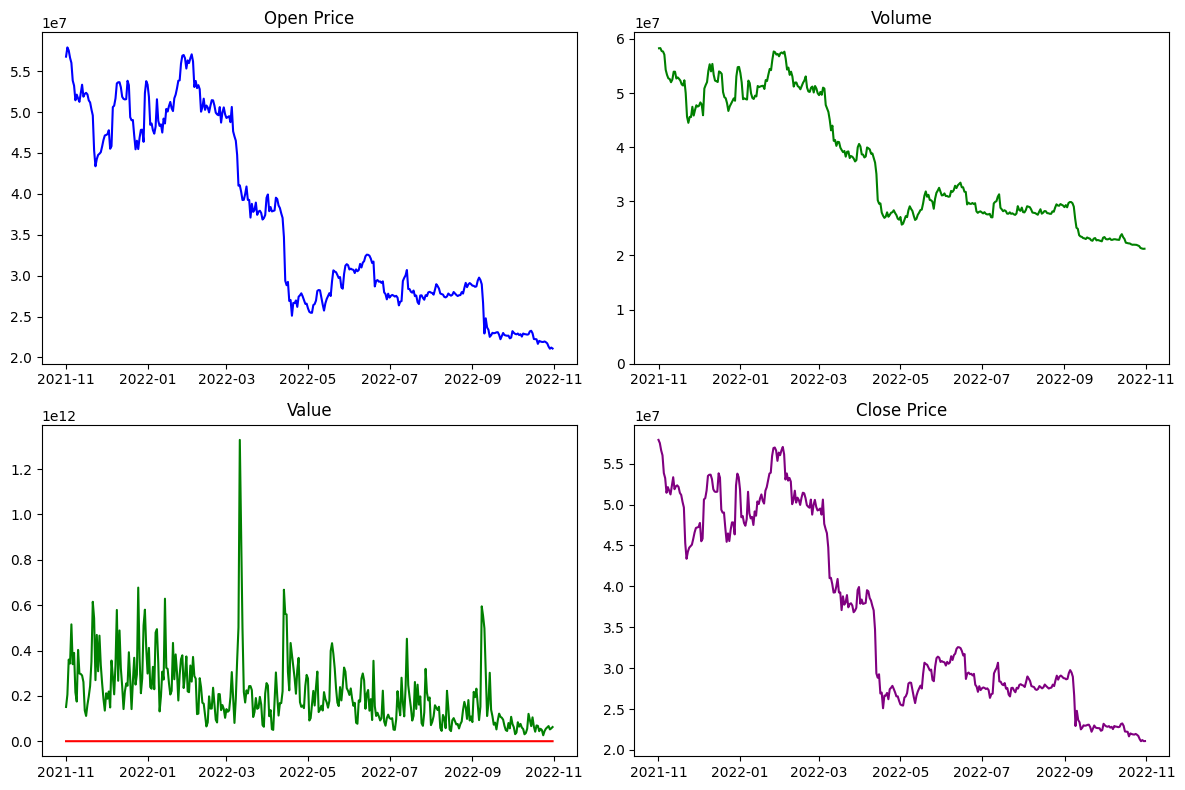

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
# 1 가격 지표 만들기
# 주어진 데이터셋
df2 = pd.read_csv('bitcoinprice.csv')

df = pd.DataFrame(df2)

# 날짜 인덱스 추가
df.index = pd.date_range('2021-11-01', periods=len(df), freq='D')

# 각 유형에 대한 그래프 그리기
plt.figure(figsize=(12, 8))

# Open 가격 그래프
plt.subplot(2, 2, 1)
plt.plot(df['open'], label='Open', color='blue')
plt.title('Open Price')

# High 가격 그래프
plt.subplot(2, 2, 2)
plt.plot(df['high'], label='High', color='green')
plt.title('High Price')

# Low 가격 그래프
plt.subplot(2, 2, 3)
plt.plot(df['low'], label='Low', color='red')
plt.title('Low Price')

# Close 가격 그래프
plt.subplot(2, 2, 4)
plt.plot(df['close'], label='Close', color='purple')
plt.title('Close Price')

# 거래량 그래프
plt.subplot(2, 2, 2)
plt.bar(df.index, df['volume'], color='blue', alpha=0.7)
plt.title('Volume')

# 시가총액 그래프
plt.subplot(2, 2, 3)
plt.plot(df['value'], label='Value', color='green')
plt.title('Value')

plt.tight_layout()
plt.show()

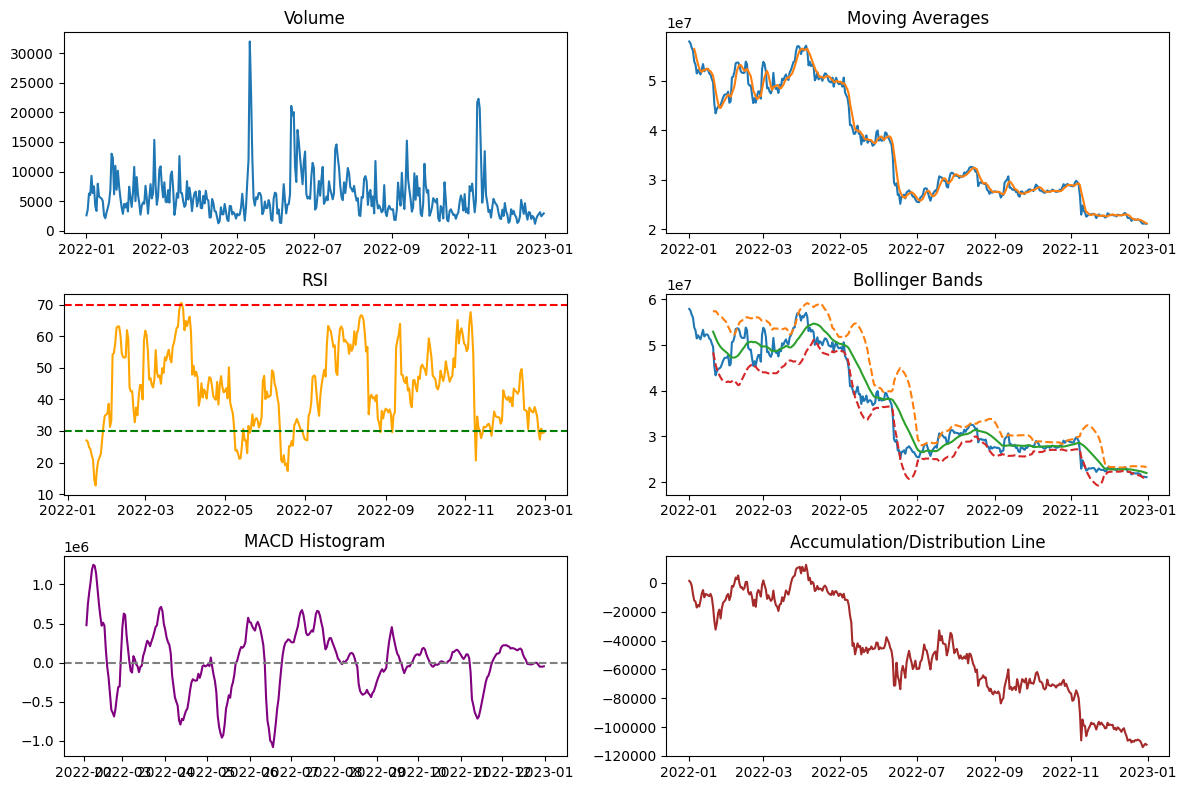

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import talib

#2 보조 지표 만들기
# 데이터 불러오기
df1 = pd.read_csv('bitcoinprice.csv')
df = pd.DataFrame(df1)

# 날짜 인덱스 추가
df.index = pd.date_range('2022-01-01', periods=len(df), freq='D')

# 보조지표 계산
# 이동평균 계산
df['MA_5'] = df['close'].rolling(window=5).mean()

# RSI 계산
rsi_period = 14
df['rsi'] = talib.RSI(df['close'], timeperiod=rsi_period)

# 볼린저 밴드 계산
df['upper_band'], df['middle_band'], df['lower_band'] = talib.BBANDS(df['close'], timeperiod=20, nbdevup=2, nbdevdn=2)

# MACD 계산
df['macd'], df['signal'], _ = talib.MACD(df['close'], fastperiod=12, slowperiod=26, signalperiod=9)

# 보조지표 그래프 찍기
# 거래량 그래프
plt.figure(figsize=(12, 8))
plt.subplot(3, 2, 1)
plt.plot(df['volume'], label='Volume')
plt.title('Volume')

# 이동평균 그래프
plt.subplot(3, 2, 2)
plt.plot(df['close'], label='Closing Price')
plt.plot(df['MA_5'], label='5-day Moving Average')
plt.title('Moving Averages')

# RSI(상대강도지수) 그래프
plt.subplot(3, 2, 3)
plt.plot(df['rsi'], label='RSI', color='orange')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('RSI')

# 볼린저 밴드 그래프
plt.subplot(3, 2, 4)
plt.plot(df['close'], label='Closing Price')
plt.plot(df['upper_band'], label='Upper Band', linestyle='--')
plt.plot(df['middle_band'], label='Middle Band')
plt.plot(df['lower_band'], label='Lower Band', linestyle='--')
plt.title('Bollinger Bands')

# MACD 그래프
plt.subplot(3, 2, 5)
plt.plot(df['macd'] - df['signal'], label='MACD Histogram', color='purple')
plt.axhline(0, color='gray', linestyle='--', label='Zero Line')
plt.title('MACD Histogram')

# 누적/분배선 그래프
plt.subplot(3, 2, 6)
df['adl'] = talib.AD(df['high'], df['low'], df['close'], df['volume'])
plt.plot(df['adl'], label='Accumulation/Distribution Line', color='brown')
plt.title('Accumulation/Distribution Line')

plt.tight_layout()
plt.show()

In [12]:
#3 환경 지표 가져오기
# 채굴 난이도


#2. 비트코인 가격정보로 csv로만들기
<모델에 학습시킬 데이터>
1. 가격 지표
2. 보조 지표
3. 환경 지표



In [13]:
#1. 가격 지표
import pandas as pd
import matplotlib.pyplot as plt

# 주어진 데이터셋
df2 = pd.read_csv('bitcoinprice.csv')
df = pd.DataFrame(df2)

# 날짜 인덱스 추가
df.index = pd.date_range('2022-01-01', periods=len(df), freq='D')

# Open 가격 데이터를 CSV 파일로 저장
open_price_data = df[['open']].copy()
open_price_data.to_csv('open_price_data.csv')

# High 가격 데이터를 CSV 파일로 저장
high_price_data = df[['high']].copy()
high_price_data.to_csv('high_price_data.csv')

# Low 가격 데이터를 CSV 파일로 저장
low_price_data = df[['low']].copy()
low_price_data.to_csv('low_price_data.csv')

# Close 가격 데이터를 CSV 파일로 저장
close_price_data = df[['close']].copy()
close_price_data.to_csv('close_price_data.csv')

# 거래량 데이터를 CSV 파일로 저장
volume_data = df[['volume']].copy()
volume_data.to_csv('volume_data.csv')

# 시가총액 데이터를 CSV 파일로 저장
value_data = df[['value']].copy()
value_data.to_csv('value_data.csv')


In [14]:
#2. 보조 지표
import pandas as pd
import matplotlib.pyplot as plt
import talib

# 데이터 불러오기
df2 = pd.read_csv('bitcoinprice.csv')
df = pd.DataFrame(df2)

# 날짜 인덱스 추가
df.index = pd.date_range('2022-01-01', periods=len(df), freq='D')

# 보조지표 계산
# 이동평균 계산
df['MA_5'] = df['close'].rolling(window=5).mean()

# RSI 계산
rsi_period = 14
df['rsi'] = talib.RSI(df['close'], timeperiod=rsi_period)

# 볼린저 밴드 계산
df['upper_band'], df['middle_band'], df['lower_band'] = talib.BBANDS(df['close'], timeperiod=20, nbdevup=2, nbdevdn=2)

# MACD 계산
df['macd'], df['signal'], _ = talib.MACD(df['close'], fastperiod=12, slowperiod=26, signalperiod=9)

# 누적/분배선 계산
df['adl'] = talib.AD(df['high'], df['low'], df['close'], df['volume'])

# 보조지표 데이터를 CSV 파일로 저장
df[['volume']].to_csv('volume_data.csv')
df[['close', 'MA_5']].to_csv('moving_average_data.csv')
df[['rsi']].to_csv('rsi_data.csv')
df[['close', 'upper_band', 'middle_band', 'lower_band']].to_csv('bollinger_bands_data.csv')
df[['macd', 'signal']].to_csv('macd_data.csv')
df[['adl']].to_csv('accumulation_distribution_data.csv')


In [33]:
df.head(60)

,Unnamed: 0,open,high,low,close,volume,value,MA_5,rsi,upper_band,middle_band,lower_band,macd,signal,adl
2022-01-01,2022-01-01 09:00:00,56784000.0,58271000.0,56762000.0,57915000.0,2628.145965,1.510645e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1388.092998
2022-01-02,2022-01-02 09:00:00,57915000.0,58300000.0,57100000.0,57531000.0,3567.505712,2.052913e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,383.245556
2022-01-03,2022-01-03 09:00:00,57540000.0,57749000.0,56133000.0,56641000.0,6304.958564,3.600635e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1957.704406
2022-01-04,2022-01-04 09:00:00,56640000.0,57685000.0,56000000.0,56023000.0,6053.445802,3.425126e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7845.892934
2022-01-05,2022-01-05 09:00:00,56023000.0,57100000.0,52701000.0,53854000.0,9296.798714,5.152768e+11,56392800.0,NaN,NaN,NaN,NaN,NaN,NaN,-12269.216350
2022-01-06,2022-01-06 09:00:00,53854000.0,54300000.0,52388000.0,53239000.0,6389.079302,3.396310e+11,55457600.0,NaN,NaN,NaN,NaN,NaN,NaN,-12970.945772
2022-01-07,2022-01-07 09:00:00,53240000.0,53358000.0,50900000.0,51449000.0,7509.108093,3.895280e+11,54241200.0,NaN,NaN,NaN,NaN,NaN,NaN,-17125.700453
2022-01-08,2022-01-08 09:00:00,51449000.0,52709000.0,50829000.0,52142000.0,4171.096458,2.154237e+11,53341400.0,NaN,NaN,NaN,NaN,NaN,NaN,-15470.573880
2022-01-09,2022-01-09 09:00:00,52142000.0,52600000.0,51144000.0,51678000.0,3369.095090,1.748699e+11,52472400.0,NaN,NaN,NaN,NaN,NaN,NaN,-16368.382187
2022-01-10,2022-01-10 09:00:00,51672000.0,51999000.0,48897000.0,51246000.0,7955.460111,4.025708e+11,51950800.0,NaN,NaN,NaN,NaN,NaN,NaN,-12275.244103


#3. 수집한 데이터로 모델에 학습시키기
LSTM
1. 가격 지표
2. 가격 + 보조
3. 가격 + 보조 + 환경




In [16]:
# 1.가격정보기반으로 학습돌린 LSTM으로 2023년 01월 비트코인 가격 예측하기
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
import datetime
import numpy as np

# CSV 파일 불러오기
open_price_data = pd.read_csv('open_price_data.csv', index_col=0)
high_price_data = pd.read_csv('high_price_data.csv', index_col=0)
low_price_data = pd.read_csv('low_price_data.csv', index_col=0)
close_price_data = pd.read_csv('close_price_data.csv', index_col=0)
volume_data = pd.read_csv('volume_data.csv', index_col=0)
value_data = pd.read_csv('value_data.csv', index_col=0)

# 데이터 병합
merged_data = pd.concat([open_price_data, high_price_data, low_price_data, close_price_data, volume_data, value_data], axis=1)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(merged_data)

# 스케일된 데이터를 DataFrame으로 변환
scaled_df = pd.DataFrame(scaled_data, columns=merged_data.columns, index=merged_data.index)

In [17]:
scaled_df

,open,high,low,close,volume,value
2022-01-01,0.969311,0.999218,0.990714,1.000000,0.046671,0.095892
2022-01-02,1.000000,1.000000,1.000000,0.989581,0.077194,0.137521
2022-01-03,0.989825,0.985135,0.973434,0.965431,0.166143,0.256338
2022-01-04,0.965404,0.983409,0.969780,0.948662,0.157971,0.242865
2022-01-05,0.948662,0.967627,0.879148,0.889808,0.263358,0.375494
...,...,...,...,...,...,...
2022-12-27,0.017637,0.013839,0.014890,0.007055,0.053637,0.026831
2022-12-28,0.007136,0.004424,0.008516,0.000000,0.063670,0.031167
2022-12-29,0.000000,0.001700,0.005714,0.003799,0.041352,0.019823
2022-12-30,0.003799,0.000000,0.000000,0.000244,0.048976,0.023355


In [18]:
x_train, x_test, y_train, y_test = train_test_split(scaled_df.drop('close', 1), scaled_df['close'], test_size=0.1, random_state=0, shuffle=False)
x_train.shape, y_train.shape
print(type(x_test))
print(x_test)

<class 'pandas.core.frame.DataFrame'>
                open      high       low    volume     value
2022-11-25  0.045422  0.042139  0.045879  0.058758  0.031976
2022-11-26  0.043849  0.043973  0.052335  0.031095  0.017435
2022-11-27  0.043008  0.041599  0.052335  0.025905  0.014602
2022-11-28  0.043415  0.039333  0.041676  0.077571  0.041501
2022-11-29  0.034406  0.037364  0.039973  0.043284  0.023409
2022-11-30  0.036794  0.055601  0.047115  0.113686  0.062504
2022-12-01  0.058284  0.058487  0.059643  0.067804  0.038083
2022-12-02  0.052830  0.048937  0.053571  0.049251  0.027331
2022-12-03  0.049276  0.046968  0.056374  0.005521  0.003775
2022-12-04  0.047756  0.048263  0.056456  0.016190  0.009602
2022-12-05  0.050388  0.051743  0.054533  0.079872  0.044236
2022-12-06  0.045260  0.044594  0.054973  0.053132  0.029396
2022-12-07  0.048190  0.044944  0.046703  0.071139  0.038551
2022-12-08  0.040240  0.047696  0.049011  0.047651  0.026166
2022-12-09  0.050388  0.047696  0.056868  0.037

<ipython-input-18-83cc70e5d9ac>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train, x_test, y_train, y_test = train_test_split(scaled_df.drop('close', 1), scaled_df['close'], test_size=0.1, random_state=0, shuffle=False)


In [19]:
def windowed_dataset(x, y, window_size, batch_size, shuffle):
    # X값 window dataset 구성
    ds_x = tf.data.Dataset.from_tensor_slices(x)
    ds_x = ds_x.window(window_size, shift=1, stride=1, drop_remainder=True)
    ds_x = ds_x.flat_map(lambda x: x.batch(window_size))
    # y값 추가
    ds_y = tf.data.Dataset.from_tensor_slices(y[window_size:])
    ds = tf.data.Dataset.zip((ds_x, ds_y))
    if shuffle:
        ds = ds.shuffle(1000)
    return ds.batch(batch_size).prefetch(1)

In [20]:
WINDOW_SIZE=5
BATCH_SIZE=32

In [21]:
train_data = windowed_dataset(x_train, y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(x_test, y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [22]:
model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 5]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [23]:
# earlystopping은 35번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=35)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename,
                             save_weights_only=True,
                             save_best_only=True,
                             monitor='val_loss',
                             verbose=1)

history = model.fit(train_data,
                    validation_data=(test_data),
                    epochs=1000,
                    callbacks=[checkpoint, earlystopping])

Epoch 1/1000
     10/Unknown - 8s 12ms/step - loss: 0.1294 - mse: 0.2587
Epoch 1: val_loss improved from inf to 0.00017, saving model to tmp/ckeckpointer.ckpt
11/11 [==============================] - 11s 362ms/step - loss: 0.1288 - mse: 0.2576 - val_loss: 1.6939e-04 - val_mse: 3.3878e-04
Epoch 2/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0921 - mse: 0.1842
Epoch 2: val_loss did not improve from 0.00017
11/11 [==============================] - 0s 10ms/step - loss: 0.0903 - mse: 0.1805 - val_loss: 5.8919e-04 - val_mse: 0.0012
Epoch 3/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0558 - mse: 0.1115
Epoch 3: val_loss did not improve from 0.00017
11/11 [==============================] - 0s 11ms/step - loss: 0.0553 - mse: 0.1106 - val_loss: 0.0026 - val_mse: 0.0052
Epoch 4/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.0274 - mse: 0.0547
Epoch 4: val_loss did not improve from 0.00017
11/11 [==============================] - 0s 11ms/step

In [24]:
print("%.7f" % (float(min(history.history['val_loss']))))
model.load_weights(filename)
pred = model.predict(test_data)
actual = np.asarray(y_test)[WINDOW_SIZE:]
actual = np.reshape(actual, (len(actual), 1))
print(pred.shape)
print(actual.shape)

0.0000475
1/1 [==============================] - 1s 537ms/step
(32, 1)
(32, 1)


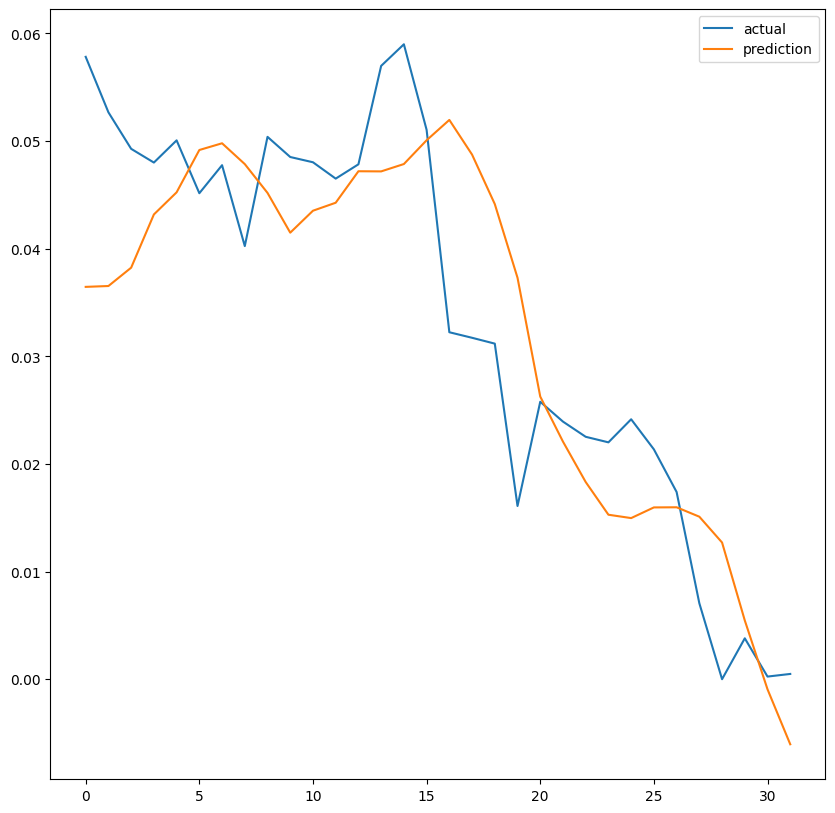

In [25]:
plt.figure(figsize=(10,10))
plt.plot(actual, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 평가 지표 계산
mae = mean_absolute_error(actual, pred)
mse = mean_squared_error(actual, pred)
rmse = mean_squared_error(actual, pred, squared=False)
r2 = r2_score(actual, pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

MAE: 0.00761525100639588
MSE: 9.494973277143716e-05
RMSE: 0.00974421534919242
R-squared: 0.7184421489009263


In [26]:
#2.가격+보조정보기반으로 학습돌린 LSTM으로 2023년 01월 비트코인 가격 예측하기
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
import datetime
import numpy as np

# CSV 파일 불러오기
open_price_data = pd.read_csv('open_price_data.csv', index_col=0)
high_price_data = pd.read_csv('high_price_data.csv', index_col=0)
low_price_data = pd.read_csv('low_price_data.csv', index_col=0)
close_price_data = pd.read_csv('close_price_data.csv', index_col=0)
volume_data = pd.read_csv('volume_data.csv', index_col=0)
value_data = pd.read_csv('value_data.csv', index_col=0)

# 데이터 병합
merged_data = pd.concat([open_price_data, high_price_data, low_price_data, close_price_data, volume_data, value_data], axis=1)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(merged_data)

# 스케일된 데이터를 DataFrame으로 변환
scaled_df = pd.DataFrame(scaled_data, columns=merged_data.columns, index=merged_data.index)

In [27]:
#3. 가격+보조+환경정보기반으로 학습돌린 LSTM으로 2023년 01월 비트코인 가격 예측해보기
